In [1]:
pip install pyreadline

     |████████████████████████████████| 112kB 3.4MB/s 
  Created wheel for pyreadline: filename=pyreadline-2.1-cp36-none-any.whl size=93834 sha256=b773e6cc0db087fabc1e57ebf447913353bb6820917f9d6158bf6bd1046a8c4a
  Stored in directory: /root/.cache/pip/wheels/70/66/59/590265c96902c7616243300c8f0d8ffe7800253ad55dfa9aa1
Successfully built pyreadline


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("/content/drive/My Drive/survey.csv") 
data.head() 

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
data.shape # мы увидим информацию о размерности нашего датафрейма 
data.info() # покажет информацию о размерности данных 
          # описание индекса, количество not-a-number элементов 
data.describe() # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max 
data.nunique() # количество уникальных значений для каждого столбца 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [5]:
feature_names = data.columns.tolist() 
for column in feature_names: 
    print (column) 
    print (data[column].value_counts(dropna=False) )

Timestamp
2014-08-27 12:31:41    2
2014-08-27 12:37:50    2
2014-08-27 12:44:51    2
2014-08-27 15:23:51    2
2014-08-27 12:43:28    2
                      ..
2014-08-27 13:26:35    1
2014-09-04 08:35:49    1
2014-08-27 12:48:37    1
2014-08-27 15:59:47    1
2014-08-27 14:57:46    1
Name: Timestamp, Length: 1246, dtype: int64
Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 5

In [6]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1259, 27), (1259, 23))

In [7]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1259, 27), (86, 27))

In [8]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,0,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,0
1,2014-08-27 11:29:37,44,M,United States,IN,0,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,0
2,2014-08-27 11:29:44,32,Male,Canada,0,0,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,0
3,2014-08-27 11:29:46,31,Male,United Kingdom,0,0,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,0
4,2014-08-27 11:30:22,31,Male,United States,TX,0,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,0


In [0]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Разделим данные на 3 категории: мужчина, женщина и другие (сюда вошли те категории, которые можно однозначно исключить из предыдущих двух, для примера - трансгендер).

In [10]:
male_terms = ["male", "m", "mal", "msle", "malr", "mail", "make", "cis male", "man", "maile", "male (cis)", "cis man"] 
female_terms = ["female", "f", "woman", "femake", "femaile", "femake", "cis female", "cis-female/femme", "female (cis)", "femail", "cis woman"] 

def clean_gender(response): 
    if response.lower().rstrip() in male_terms: 
        return "Male" 
    elif response.lower().rstrip() in female_terms: 
        return "Female" 
    else:  
        return "Other" 

data['Gender'] = data["Gender"].apply(lambda x: clean_gender(x)) 
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Возьмем эвристическую оценку, в каком возрасте могут работать люди: от 14 до 100 лет. И все величины, не попадающие в этот диапазон, преобразуем в формат Not-a-Number.

In [11]:
data.Age.loc [(data.Age <14) | (data.Age> 100)] = np.nan
feature_names = data.columns.tolist() 
for column in feature_names: 
    print (column) 
    print (data[column].value_counts(dropna=False) )

Timestamp
2014-08-27 12:31:41    2
2014-08-27 12:37:50    2
2014-08-27 12:44:51    2
2014-08-27 15:23:51    2
2014-08-27 12:43:28    2
                      ..
2014-08-27 13:26:35    1
2014-09-04 08:35:49    1
2014-08-27 12:48:37    1
2014-08-27 15:59:47    1
2014-08-27 14:57:46    1
Name: Timestamp, Length: 1246, dtype: int64
Age
29.0    85
32.0    82
26.0    75
27.0    71
33.0    70
28.0    68
31.0    67
34.0    65
30.0    63
25.0    61
35.0    55
23.0    51
24.0    46
37.0    43
38.0    39
36.0    37
39.0    33
40.0    33
43.0    28
22.0    21
41.0    21
42.0    20
21.0    16
45.0    12
46.0    12
44.0    11
19.0     9
NaN      8
18.0     7
20.0     6
50.0     6
48.0     6
51.0     5
56.0     4
49.0     4
57.0     3
55.0     3
54.0     3
60.0     2
47.0     2
62.0     1
58.0     1
53.0     1
61.0     1
72.0     1
65.0     1
Name: Age, dtype: int64
Gender
Male      990
Female    247
Other      22
Name: Gender, dtype: int64
Country
United States             751
United Kingdom         

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Эти нулевые значения затем могут быть обработаны с использованием описанного выше sklearn Imputer.
После определения диапазона для работающего человека, визуализируем распределение возраста, присутствующего в этом наборе данных.

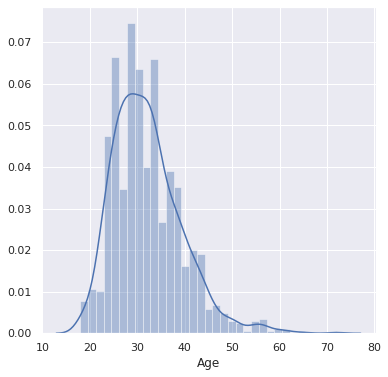

In [15]:
%matplotlib inline   
import seaborn as sns 
sns.set(color_codes=True) 
plot = sns.distplot(data.Age.dropna()) 
plot.figure.set_size_inches(6,6) 

In [16]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета

total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Всего строк: 1259
Колонка Age. Тип данных float64. Количество пустых значений 8, 0.64%.


In [17]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Age
0,37.0
1,44.0
2,32.0
3,31.0
4,31.0
...,...
1254,26.0
1255,32.0
1256,34.0
1257,46.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


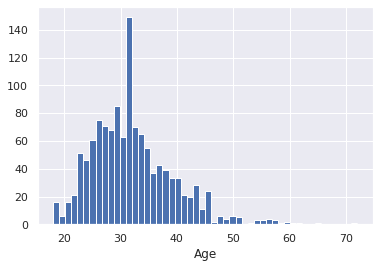

In [18]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [19]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Age'].isnull()].index
flt_index

Int64Index([143, 364, 390, 715, 734, 989, 1090, 1127], dtype='int64')

In [20]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,NaN,Male,United States,MN,No,No,No,NaN,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
364,2014-08-27 15:05:21,NaN,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,NaN,Other,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
715,2014-08-28 10:07:53,NaN,Male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,NaN,Male,United States,OH,No,No,No,NaN,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,NaN,Other,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,NaN,Male,United States,OH,Yes,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,NaN,Other,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


In [21]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Age']

143    NaN
364    NaN
390    NaN
715    NaN
734    NaN
989    NaN
1090   NaN
1127   NaN
Name: Age, dtype: float64

In [22]:
data_num_MasVnrArea = data_num[['Age']]
data_num_MasVnrArea.head()

,Age
0,37.0
1,44.0
2,32.0
3,31.0
4,31.0


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [24]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [0]:
strategies=['mean', 'median','most_frequent']

In [0]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [27]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([32.07673861, 32.07673861, 32.07673861, 32.07673861, 32.07673861,
        32.07673861, 32.07673861, 32.07673861]))

In [28]:
strategies[1], test_num_impute(strategies[1])

('median', array([31., 31., 31., 31., 31., 31., 31., 31.]))

In [29]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([29., 29., 29., 29., 29., 29., 29., 29.]))

In [0]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [31]:
    data[['Age']].describe()

,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [32]:
test_num_impute_col(data, 'Age', strategies[0])

('Age', 'mean', 8, 32.07673860911271, 32.07673860911271)

In [33]:
test_num_impute_col(data, 'Age', strategies[1])

('Age', 'median', 8, 31.0, 31.0)

In [34]:
test_num_impute_col(data, 'Age', strategies[2])

('Age', 'most_frequent', 8, 29.0, 29.0)

**Часть 2.**


- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('/content/adult.data.csv', sep=',')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [43]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (*age* feature) of women?**

In [44]:
df[df.sex == 'Female'].age.mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [45]:
df['native-country'].value_counts(normalize=True)['Germany']*100

0.42074874850281013

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [46]:
df.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [47]:
df.groupby(by='salary').agg({'age':['mean','std']})

age           
             mean        std
salary                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028

**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [48]:
df[df.salary=='>50K'].education.value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

No

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [49]:
df.groupby(by=['race', 'sex']).age.describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [50]:
df1 = df.groupby(by=['race', 'sex']).age.describe()
df1.loc['Amer-Indian-Eskimo', 'Male']['max']

82.0

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [51]:
df[df.salary=='>50K'].groupby(by='marital-status').age.count()

marital-status
Divorced                  463
Married-AF-spouse          10
Married-civ-spouse       6692
Married-spouse-absent      34
Never-married             491
Separated                  66
Widowed                    85
Name: age, dtype: int64

answer = among married

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [52]:
#df.sort_values(by='hours-per-week', ascending=False)
mx = df['hours-per-week'].max()
mx

99

In [53]:
df[df['hours-per-week'] == mx].count()

age               85
workclass         85
fnlwgt            85
education         85
education-num     85
marital-status    85
occupation        85
relationship      85
race              85
sex               85
capital-gain      85
capital-loss      85
hours-per-week    85
native-country    85
salary            85
dtype: int64

In [54]:
df[df['hours-per-week'] == mx].salary.value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

answer = 0.705882

**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [0]:
# You code here

In [56]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [0]:
df_hpw = df.groupby(by=['native-country', 'salary']).agg({'hours-per-week':'mean'})

In [58]:
df_hpw.loc['Japan']

,hours-per-week
salary,
<=50K,41.000000
>50K,47.958333


In [0]:
df1 = df.iloc[0:4]
df2 = df.iloc[50:53]

### Получим из таблицы с исходными данными топ3 людей, чей возраст меньше 40

In [63]:
!pip install pandasql
!pip install pandas


In [0]:
import pandasql as ps
import pandas as pd

In [65]:
simple_query = '''
    SELECT 
        age,
        workclass,
        fnlwgt,
        education
    FROM df 
    WHERE age < 40
    ORDER BY age desc
    LIMIT 3
    
    '''
%time df_ps = ps.sqldf(simple_query, locals())
df_ps

CPU times: user 563 ms, sys: 41.9 ms, total: 605 ms
Wall time: 610 ms


,age,workclass,fnlwgt,education
0,39,State-gov,77516,Bachelors
1,39,Private,367260,HS-grad
2,39,Private,365739,Some-college


In [66]:
columns = ['age', 'workclass', 'fnlwgt', 'education']
%time df_pd = df.loc[df.age < 40, columns].sort_values(by='age', ascending=False).head(3)
df_pd

CPU times: user 9.93 ms, sys: 986 µs, total: 10.9 ms
Wall time: 13.3 ms


,age,workclass,fnlwgt,education
0,39,State-gov,77516,Bachelors
12603,39,Private,185053,HS-grad
1608,39,Private,379350,10th


In [0]:
def example2_pandasql(data):
    aggr_query = '''
        SELECT 
            count(age) as count,
            avg(age)  as mean,
            min(age)   as mean
        FROM data
        GROUP BY race
        '''
    return ps.sqldf(aggr_query, locals()).set_index('age')

In [68]:
df.groupby(by=['race', 'sex']).age.describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [69]:
%time pd.concat([df1, df2]) 

CPU times: user 5.93 ms, sys: 255 µs, total: 6.19 ms
Wall time: 6.84 ms


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
50,25,Private,32275,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Other,Female,0,0,40,United-States,<=50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
